# Explore here

In [21]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

# Define the folder where you want to save the file
folder_path = os.path.expanduser("/Users/taylorclements/Desktop/Coding")  # Change to your preferred location
file_path = os.path.join(folder_path, "AB_NYC_2019.csv")

# Create the folder if it doesn’t exist
os.makedirs(folder_path, exist_ok=True)

# Download and save the file
response = requests.get(url)
with open(file_path, "wb") as file:
    file.write(response.content)

print(f"File downloaded successfully and saved as {file_path}")



File downloaded successfully and saved as /Users/taylorclements/Desktop/Coding/AB_NYC_2019.csv


In [10]:
df = pd.read_csv(file_path)
print(df.head())  # Display first few rows

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [12]:
print(df.shape)  # Display the number of rows and columns
print(df.columns)

(48895, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [14]:
df_1 = df.drop(columns=["id", "host_id", "host_name"])

In [15]:
print(df_1.shape)

(48895, 13)


In [16]:
df_1.isna().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df_1[df_1["name"].isna()]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,NaN,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,NaN,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,NaN,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,NaN,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,NaN,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,NaN,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,NaN,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,NaN,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,NaN,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,NaN,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [23]:
#looks like it's okay to leave the items with missing values in the name column

df_1.drop("name", axis=1).duplicated().sum()

np.int64(0)

In [30]:
#Going to remove the long/lat and assume that neighborhood is enough to determine location
df_2 = df_1.drop(columns=["name", "latitude", "longitude"])

print(df_2["calculated_host_listings_count"].value_counts())   



calculated_host_listings_count
1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: count, dtype: int64


Interesting. So 32303 out of 48895 are single hosts - 1 property. 
May be worth splitting those up. Or have everyone cut into a few different categories. 

The most is 16 properties 

column = calculated_host_listings_count

In [32]:
print(df_2.columns)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [38]:
print(df_2.head())
print(df_2.max(numeric_only=True))

  neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews last_review  reviews_per_month  \
0                  9  2018-10-19               0.21   
1                 45  2019-05-21               0.38   
2                  0         NaN                NaN   
3                270  2019-07-05               4.64   
4                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               

Looks like the numerical columns are:
price, min nights, num reviews, last review, reviews/month, listing count, availability

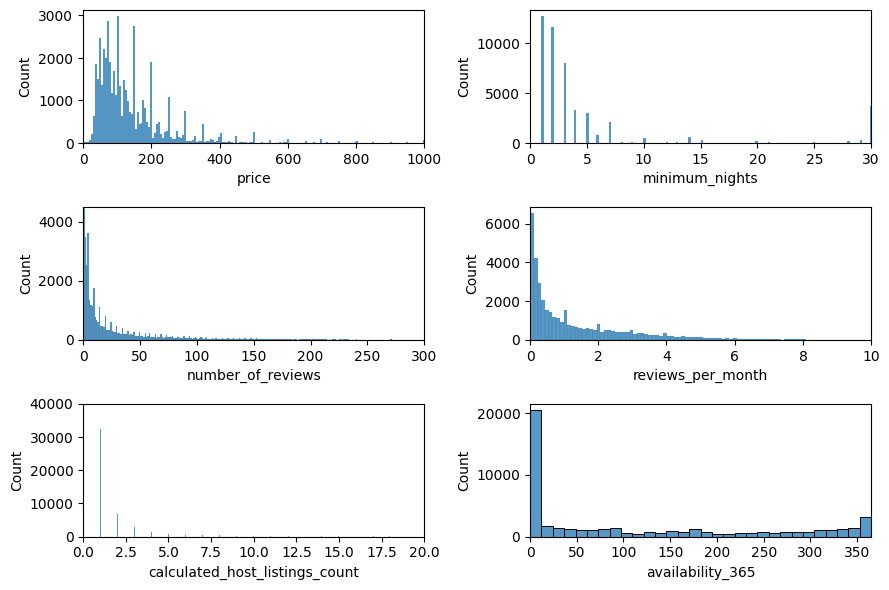

In [49]:
#no duplicates in the name column



fig, axis = plt.subplots(3, 2, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df_2, x = "price").set_xlim(0, 1000)   # Set the x-axis limits
sns.histplot(ax = axis[0, 1], data = df_2, x = "minimum_nights").set_xlim(0, 30)
sns.histplot(ax = axis[1, 0], data = df_2, x = "number_of_reviews").set(xlim = (0, 300), ylim=(0,4500))  # Set the limits
sns.histplot(ax = axis[1, 1], data = df_2, x = "reviews_per_month").set_xlim(0, 10)
sns.histplot(ax = axis[2, 0], data = df_2, x = "calculated_host_listings_count").set(xlim = (0, 20), ylim=(0, 40000))
sns.histplot(ax = axis[2, 1], data = df_2, x = "availability_365").set_xlim(0, 365)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
